In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = 'synthetic_navigation_data.csv'  # Update with your dataset path
data = pd.read_csv(file_path)

# Features and target
X = data[['x_acc', 'y_acc', 'z_acc', 'x_gyro', 'y_gyro', 'z_gyro']]
y = data['magnitude_acc']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [2]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.4f}")
    print(f"{name} - R-squared: {r2:.4f}")
    print("-" * 50)


Training Linear Regression...
Linear Regression - Mean Squared Error: 0.0756
Linear Regression - R-squared: -0.0588
--------------------------------------------------
Training Random Forest Regressor...
Random Forest Regressor - Mean Squared Error: 0.0127
Random Forest Regressor - R-squared: 0.8214
--------------------------------------------------
Training Support Vector Regressor...
Support Vector Regressor - Mean Squared Error: 0.0138
Support Vector Regressor - R-squared: 0.8072
--------------------------------------------------
Training XGBoost Regressor...
XGBoost Regressor - Mean Squared Error: 0.0120
XGBoost Regressor - R-squared: 0.8321
--------------------------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate on the test set
y_pred_best = best_model.predict(X_test)
print(f"Best Model - Mean Squared Error: {mean_squared_error(y_test, y_pred_best):.4f}")
print(f"Best Model - R-squared: {r2_score(y_test, y_pred_best):.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best Model - Mean Squared Error: 0.0065
Best Model - R-squared: 0.9088


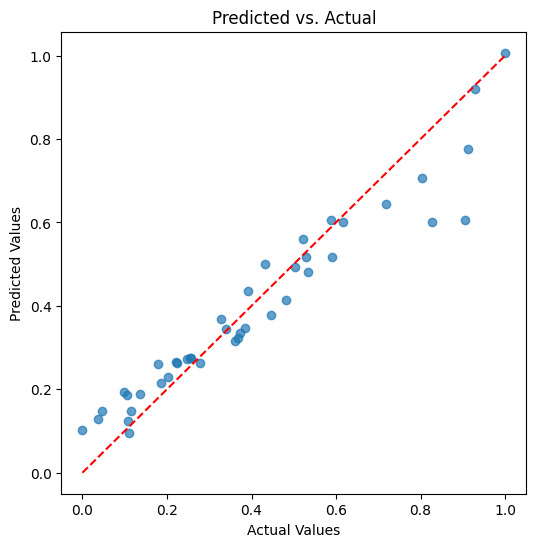

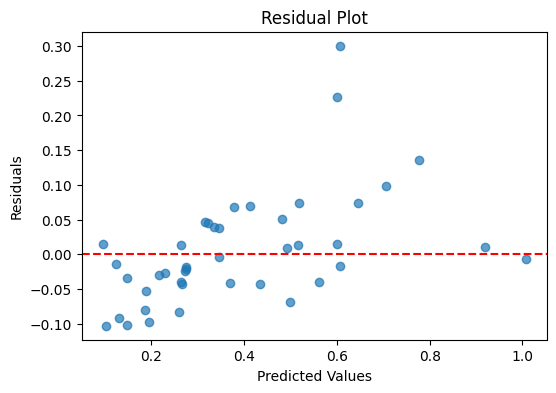

In [ ]:
import matplotlib.pyplot as plt

# Predicted vs. Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred_best
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_best, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'xgboost_regressor.pkl')
print("Model saved as xgboost_regressor.pkl")


Model saved as xgboost_regressor.pkl


In [ ]:
# Load the model
loaded_model = joblib.load('xgboost_regressor.pkl')

# Predict on new data
new_data = [[0.1, -0.5, 0.8, -0.2, 0.3, -0.1]]  # Example input
scaled_data = scaler.transform(new_data)
predicted_value = loaded_model.predict(scaled_data)
print(f"Predicted Magnitude of Acceleration: {predicted_value[0]:.4f}")


Predicted Magnitude of Acceleration: 1.0703


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import seaborn as sns

In [ ]:
correlation_matrix = data[['x_acc', 'y_acc', 'z_acc', 'x_gyro', 'y_gyro', 'z_gyro', 'magnitude_acc']].corr()

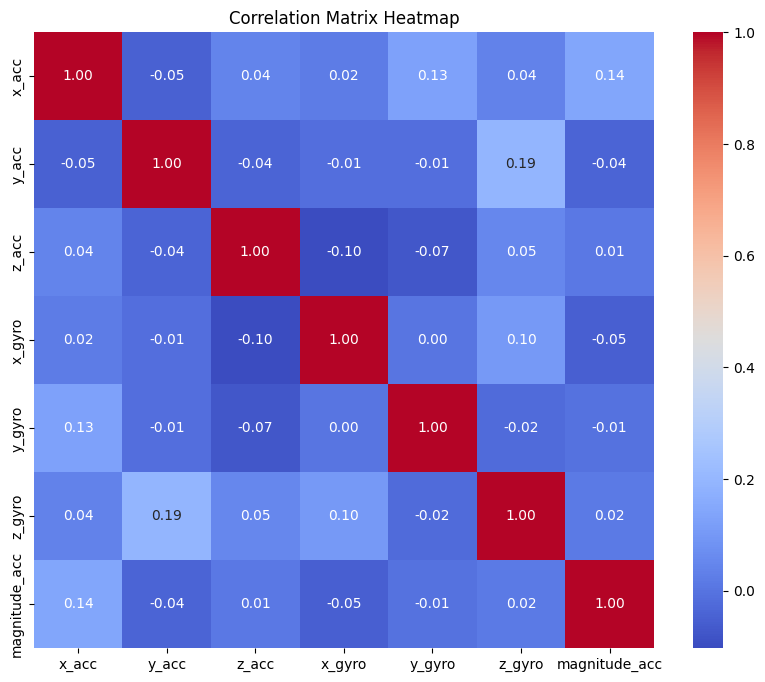

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')  # Saves the StandardScaler object for deployment
print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl
